In [2]:
#Importing needed libraries

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('/content/Dataset2.csv', encoding='latin-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No.                                        81 non-null     int64  
 1   Date of Admission                          81 non-null     object 
 2   D.O.B.                                     81 non-null     object 
 3   Age                                        81 non-null     int64  
 4   Gender                                     81 non-null     object 
 5   Ethnicity                                  81 non-null     object 
 6   Nationality                                81 non-null     object 
 7   Height (cm)                                77 non-null     float64
 8   Weight (kg)                                79 non-null     float64
 9   Type of Presentation                       81 non-null     object 
 10  DM                          

In [4]:
# To convert string to float
df['FOLATE'] = df['FOLATE'].str.replace('<', '', regex=False)  # Remove '<'
df['FOLATE'] = pd.to_numeric(df['FOLATE'], errors='coerce') # Convert to numeric, handle errors

In [5]:
# To convert string to float
df['B12'] = df['B12'].str.replace('<', '', regex=False)  # Remove '<'
df['B12'] = pd.to_numeric(df['B12'], errors='coerce') # Convert to numeric, handle errors

In [6]:
# Replacing the Missing Values with the Mean

df['Height (cm)'] = df['Height (cm)'].fillna(df['Height (cm)'].mean())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].mean())
df['Total Cholesterol'] = df['Total Cholesterol'].fillna(df['Total Cholesterol'].mean())
df['LDL-C'] = df['LDL-C'].fillna(df['LDL-C'].mean())
df['Value pg/mL=ng/L or pmol/L'] = df['Value pg/mL=ng/L or pmol/L'].fillna(df['Value pg/mL=ng/L or pmol/L'].mean())
df['Triglycerides'] = df['Triglycerides'].fillna(df['Triglycerides'].mean())
df['HDL'] = df['HDL'].fillna(df['HDL'].mean())
df['HOMOCYSTEINE'] = df['HOMOCYSTEINE'].fillna(df['HOMOCYSTEINE'].mean())
df['B1'] = df['B1'].fillna(df['B1'].mean())
df['B6'] = df['B6'].fillna(df['B6'].mean())
df['B12'] = df['B12'].fillna(df['B12'].mean())
df['FOLATE'] = df['FOLATE'].fillna(df['FOLATE'].mean())


In [7]:
# Replace the Height cm column with meters
df['Height (cm)'] = df['Height (cm)'] / 100
df.rename(columns={'Height (cm)': 'Height m'}, inplace=True)



In [8]:
# Calculation of BMI
df['BMI'] = df['Weight (kg)']/ df['Height m'] ** 2

In [9]:
# Calculation of Obesity
df['obesity'] = df['BMI'].apply(lambda x: 'Yes' if x >= 30 else 'No')

In [10]:
df.describe()

,No.,Age,Height m,Weight (kg),HR (bpm),BP High,BP Low,Peak Creatinine (µmol/L or mg/dl),Value pg/mL=ng/L or pmol/L,Lowest Hb,...,Triglycerides,HDL,"If Dead, date of death",HOMOCYSTEINE,B12,FOLATE,B1,B6,SYNTAX,BMI
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,0.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,43.864198,1.692208,86.848101,81.716049,130.827160,80.185185,84.775309,130.647500,14.179506,...,1.957662,1.012597,NaN,9.152464,267.648649,21.679730,27.616364,12.218182,12.728395,30.259056
std,23.526581,7.944736,0.073699,17.137297,18.670320,23.084513,15.895842,45.891951,168.460764,2.031205,...,1.304951,0.303996,NaN,4.160187,112.077142,7.713413,5.821464,4.486566,10.190697,5.271622
min,1.000000,18.000000,1.440000,54.000000,51.000000,90.000000,51.000000,45.000000,10.000000,8.200000,...,0.500000,0.310000,NaN,1.640000,21.000000,7.400000,14.900000,4.600000,0.000000,18.685121
25%,21.000000,40.000000,1.650000,78.000000,70.000000,115.000000,70.000000,71.400000,20.600000,13.300000,...,1.190000,0.840000,NaN,7.070000,182.000000,15.300000,24.600000,9.300000,5.000000,27.117769
50%,41.000000,45.000000,1.700000,84.000000,80.000000,128.000000,80.000000,78.000000,91.600000,14.500000,...,1.620000,0.970000,NaN,8.800000,260.000000,21.500000,27.616364,12.218182,10.000000,29.384757
75%,61.000000,50.000000,1.720000,97.000000,90.000000,143.000000,89.000000,86.700000,130.647500,15.400000,...,2.190000,1.120000,NaN,9.580000,318.000000,25.500000,30.400000,12.218182,19.000000,33.262141
max,81.000000,61.000000,1.880000,139.000000,160.000000,220.000000,140.000000,462.700000,1031.500000,17.900000,...,7.480000,2.230000,NaN,33.860000,607.000000,39.300000,43.100000,26.400000,37.000000,48.096886


In [ ]:
df['Total Cholesterol'].describe()

,Total Cholesterol
count,81.000000
mean,5.360274
std,1.429227
min,1.550000
25%,4.400000
50%,5.360274
75%,6.200000
max,9.670000


In [ ]:
df['LDL-C'].describe()

,LDL-C
count,81.000000
mean,3.619737
std,1.210149
min,1.010000
25%,2.690000
50%,3.619737
75%,4.330000
max,7.110000


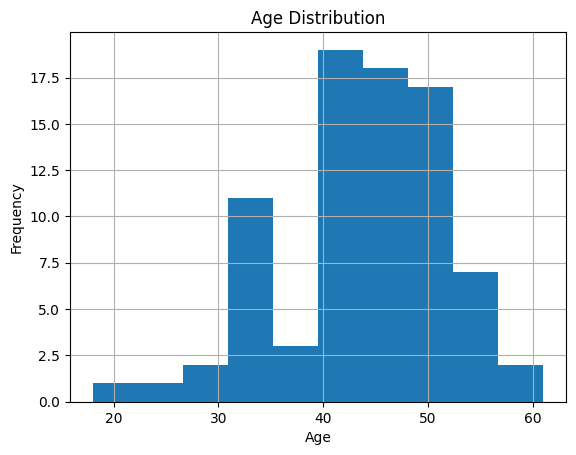

In [ ]:
#Histogram for age
df['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

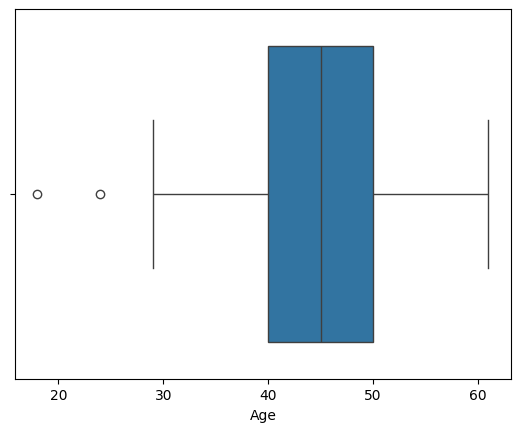

In [ ]:
# Create the box plot for Age
sns.boxplot(x=df['Age'])
plt.show()

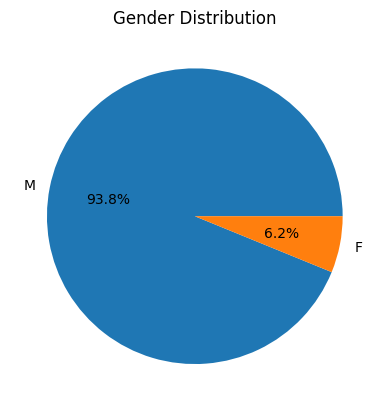

In [ ]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

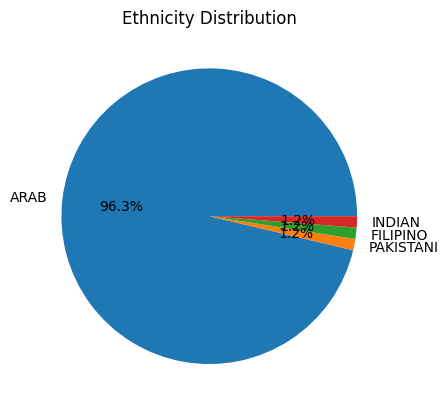

In [ ]:
# Count the occurrences of each etnicity
gender_counts = df['Ethnicity'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Ethnicity Distribution')
plt.show()

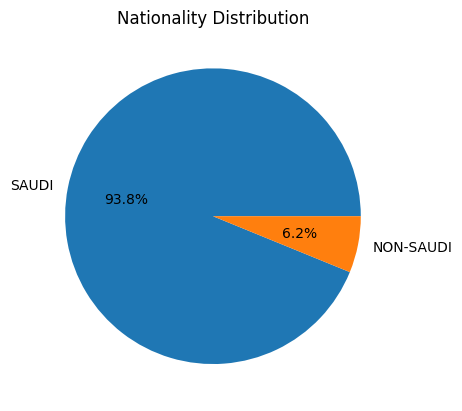

In [ ]:
# Count the occurrences of each Nationality
gender_counts = df['Nationality'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Nationality Distribution')
plt.show()

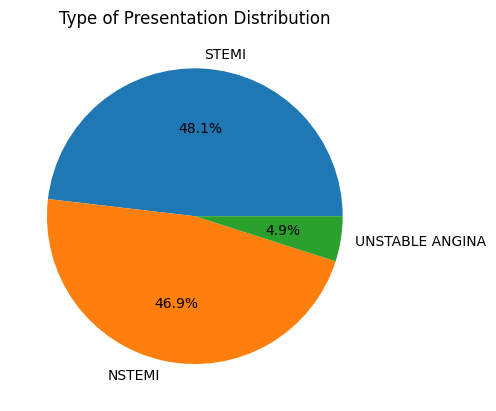

In [ ]:
# Count the occurrences of each type of Presentation
gender_counts = df['Type of Presentation'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Type of Presentation Distribution')
plt.show()

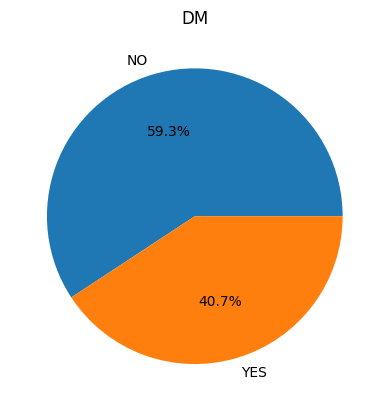

In [ ]:
# Count the occurrences of each DM
gender_counts = df['DM'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('DM')
plt.show()

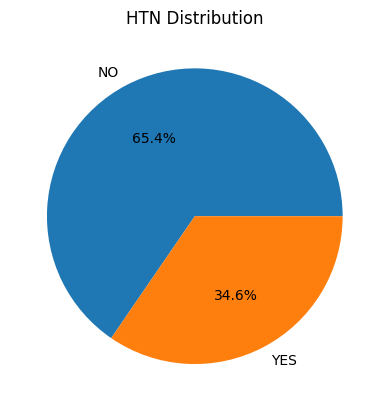

In [ ]:
# Count the occurrences of each HTN
gender_counts = df['HTN'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('HTN Distribution')
plt.show()

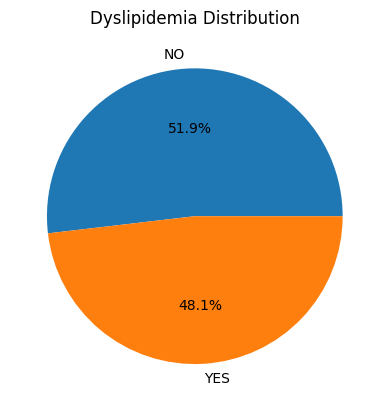

In [ ]:
# Count the occurrences of each Dyslipidemia
gender_counts = df['Dyslipidemia'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Dyslipidemia Distribution')
plt.show()

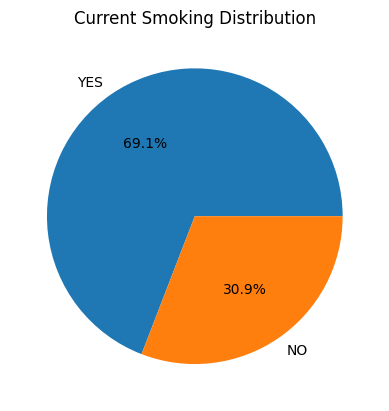

In [ ]:
# Count the occurrences of each Current Smoking
gender_counts = df['Current Smoking'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Current Smoking Distribution')
plt.show()

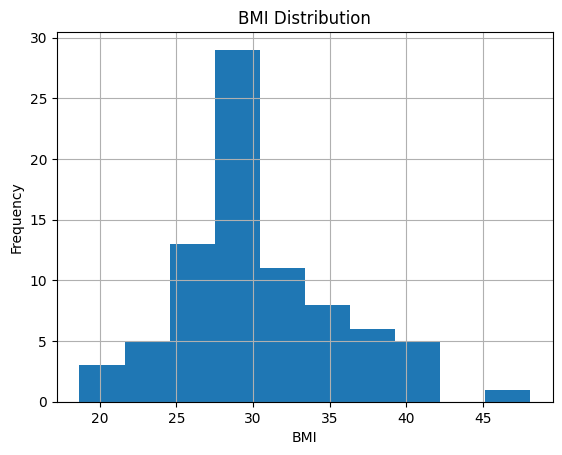

In [ ]:
#Histogram for BMI
df['BMI'].hist(bins=10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

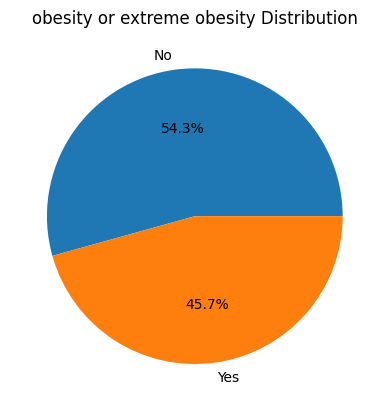

In [ ]:
# Count the occurrences of each obesity
gender_counts = df['obesity'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('obesity or extreme obesity Distribution')
plt.show()

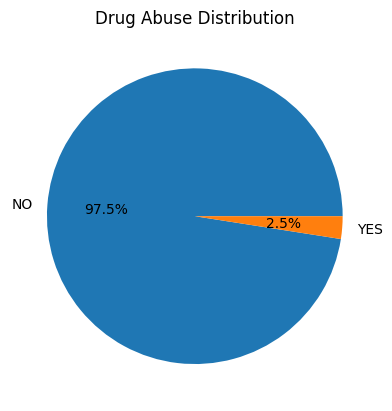

In [ ]:
# Count the occurrences of each Drug Abuse
gender_counts = df['Drug Abuse'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Drug Abuse Distribution')
plt.show()

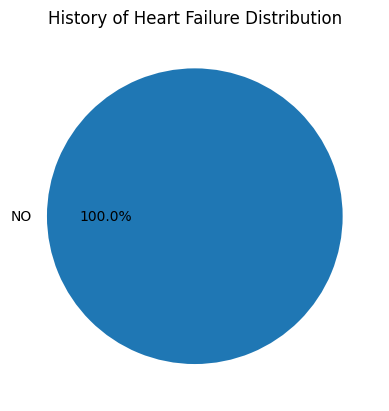

In [ ]:
# Count the occurrences of each History of Heart Failure
gender_counts = df['History of Heart Failure'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('History of Heart Failure Distribution')
plt.show()

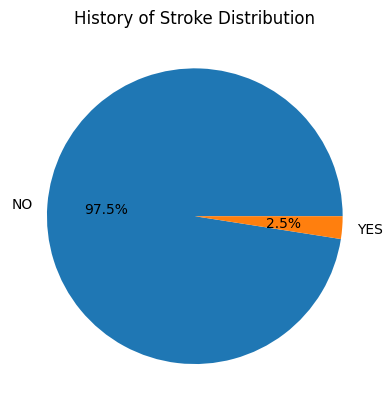

In [ ]:
# Count the occurrences of each History of Stroke
gender_counts = df['History of Stroke'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('History of Stroke Distribution')
plt.show()

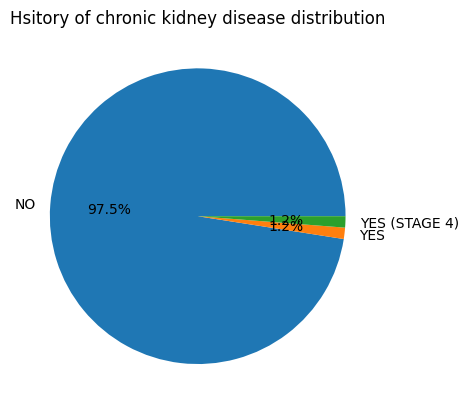

In [ ]:
# Count the occurrences of each History of chronic kidney disease
gender_counts = df['Hsitory of chronic kidney disease'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Hsitory of chronic kidney disease distribution')
plt.show()

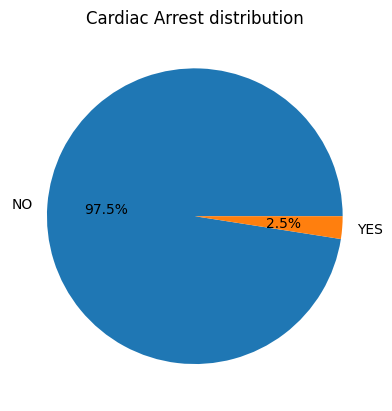

In [ ]:
# Count the occurrences of each History of Cardiac Arrest
gender_counts = df['Cardiac Arrest'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Cardiac Arrest distribution')
plt.show()

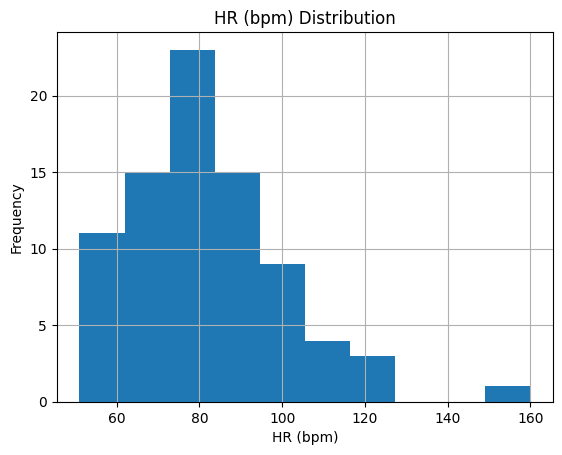

In [ ]:
#Histogram for HR (bpm)
df['HR (bpm)'].hist(bins=10)
plt.xlabel('HR (bpm)')
plt.ylabel('Frequency')
plt.title('HR (bpm) Distribution')
plt.show()

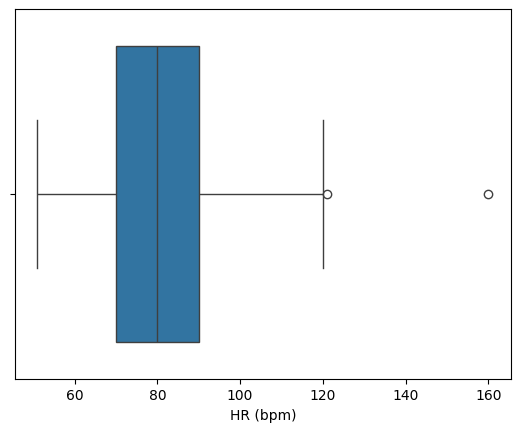

In [ ]:
# Create the box plot for HR (bpm)
sns.boxplot(x=df['HR (bpm)'])
plt.show()

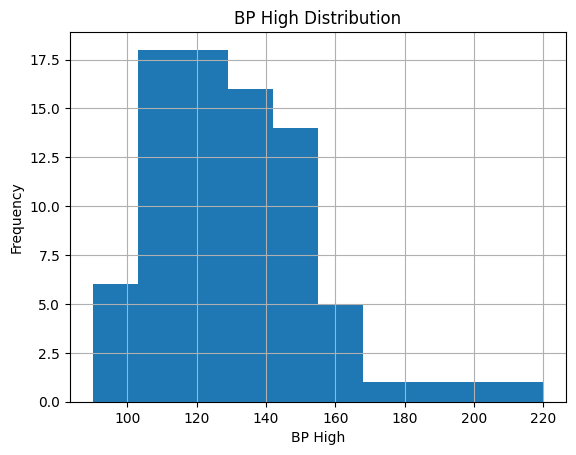

In [ ]:
#Histogram for BP High
df['BP High'].hist(bins=10)
plt.xlabel('BP High')
plt.ylabel('Frequency')
plt.title('BP High Distribution')
plt.show()

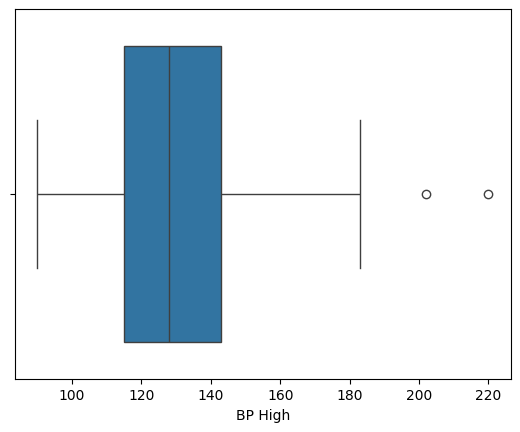

In [ ]:
# Create the box plot for BP High
sns.boxplot(x=df['BP High'])
plt.show()

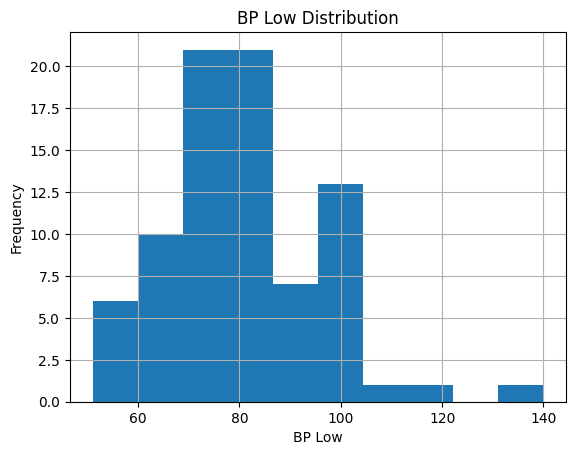

In [ ]:
#Histogram for BP Low
df['BP Low'].hist(bins=10)
plt.xlabel('BP Low')
plt.ylabel('Frequency')
plt.title('BP Low Distribution')
plt.show()

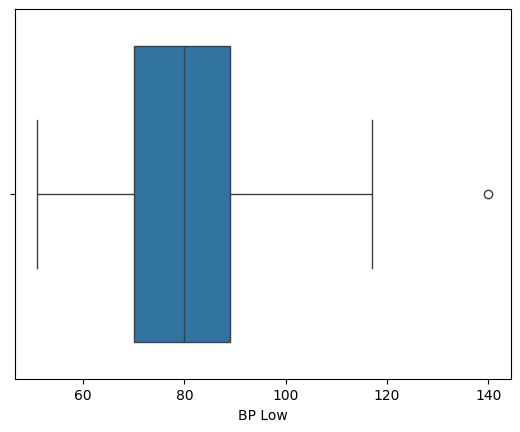

In [ ]:
# Create the box plot for BP Low
sns.boxplot(x=df['BP Low'])
plt.show()

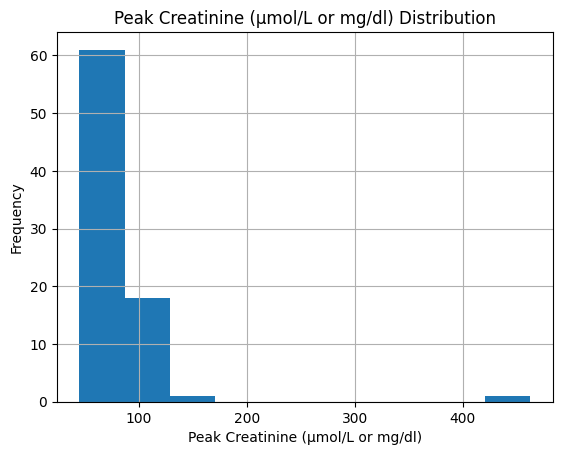

In [ ]:
#Histogram for Peak Creatinine (µmol/L or mg/dl)
df['Peak Creatinine (µmol/L or mg/dl)'].hist(bins=10)
plt.xlabel('Peak Creatinine (µmol/L or mg/dl)')
plt.ylabel('Frequency')
plt.title('Peak Creatinine (µmol/L or mg/dl) Distribution')
plt.show()

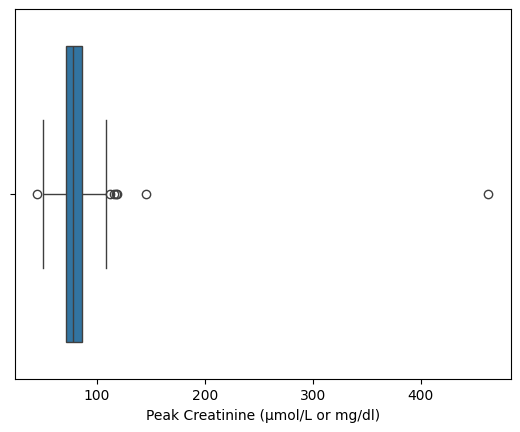

In [ ]:
# Create the box plot for Peak Creatinine (µmol/L or mg/dl)
sns.boxplot(x=df['Peak Creatinine (µmol/L or mg/dl)'])
plt.show()


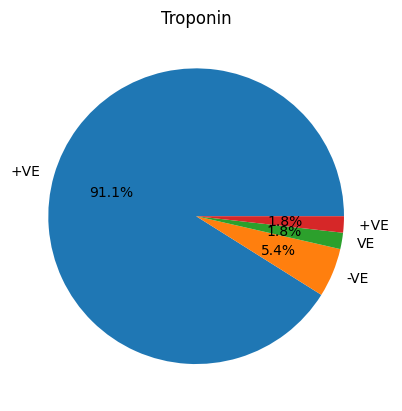

In [ ]:
# Count the occurrences of each Troponin
gender_counts = df['Troponin'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Troponin')
plt.show()

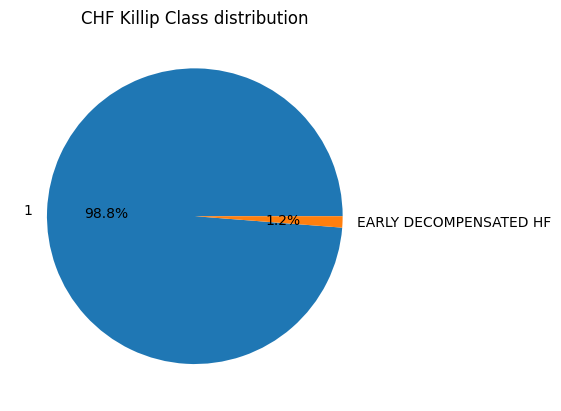

In [ ]:
# Count the occurrences of each CHF Killip Class
gender_counts = df['CHF Killip Class'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('CHF Killip Class distribution')
plt.show()

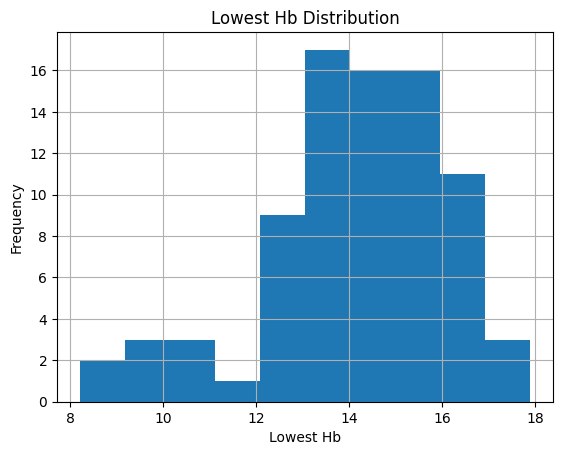

In [ ]:
#Histogram for Lowest Hb
df['Lowest Hb'].hist(bins=10)
plt.xlabel('Lowest Hb')
plt.ylabel('Frequency')
plt.title('Lowest Hb Distribution')
plt.show()


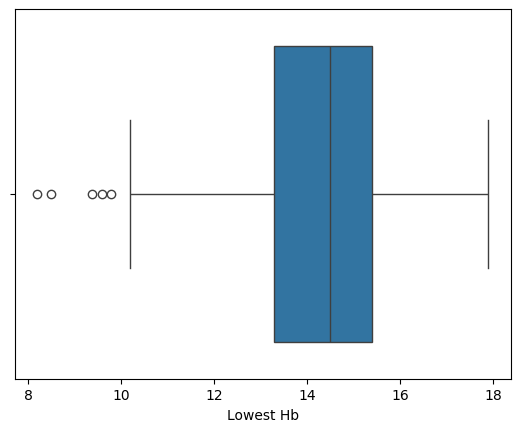

In [ ]:
# Create the box plot for 'Lowest Hb
sns.boxplot(x=df['Lowest Hb'])
plt.show()

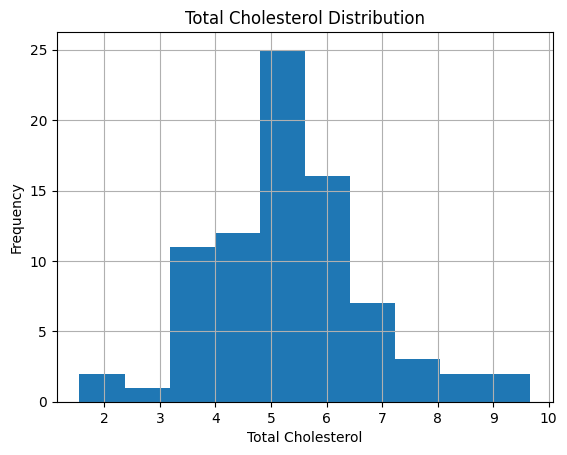

In [ ]:
#Histogram for Total Cholesterol
df['Total Cholesterol'].hist(bins=10)
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.title('Total Cholesterol Distribution')
plt.show()



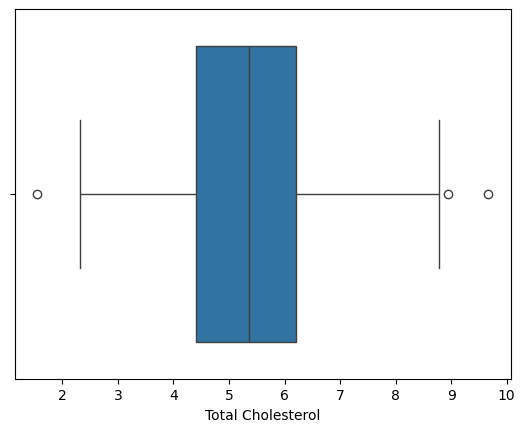

In [ ]:
# Create the box plot for Total Cholesterol
sns.boxplot(x=df['Total Cholesterol'])
plt.show()

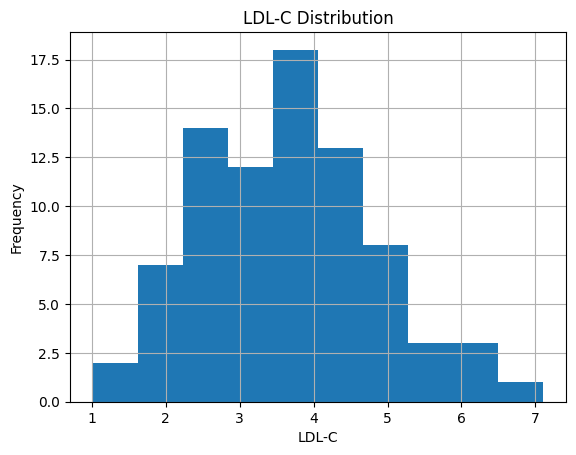

In [ ]:
#Histogram for LDL-C
df['LDL-C'].hist(bins=10)
plt.xlabel('LDL-C')
plt.ylabel('Frequency')
plt.title('LDL-C Distribution')
plt.show()

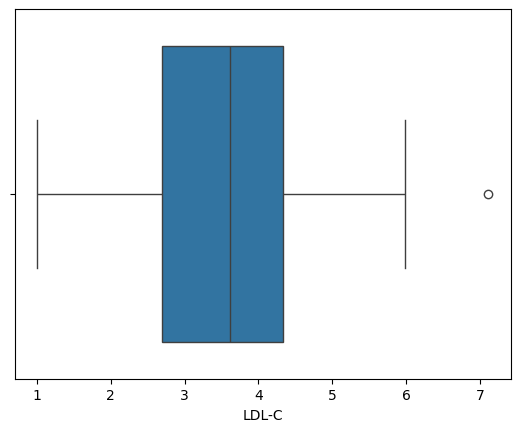

In [ ]:
# Create the box plot for LDL-C
sns.boxplot(x=df['LDL-C'])
plt.show()

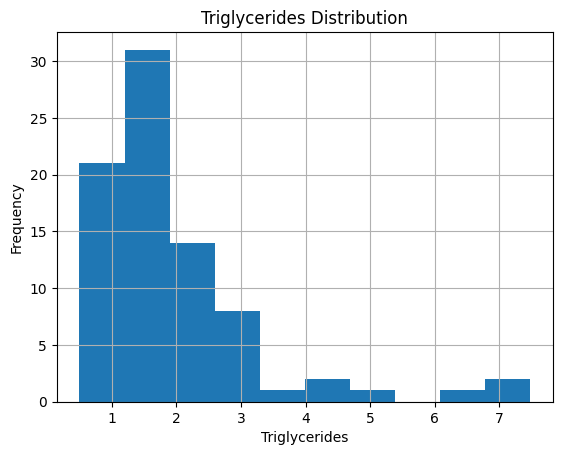

In [ ]:
#Histogram for Triglycerides
df['Triglycerides'].hist(bins=10)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Triglycerides Distribution')
plt.show()

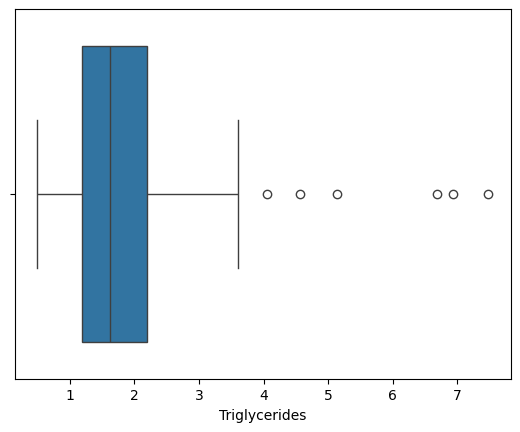

In [ ]:
# Create the box plot for Triglycerides
sns.boxplot(x=df['Triglycerides'])
plt.show()

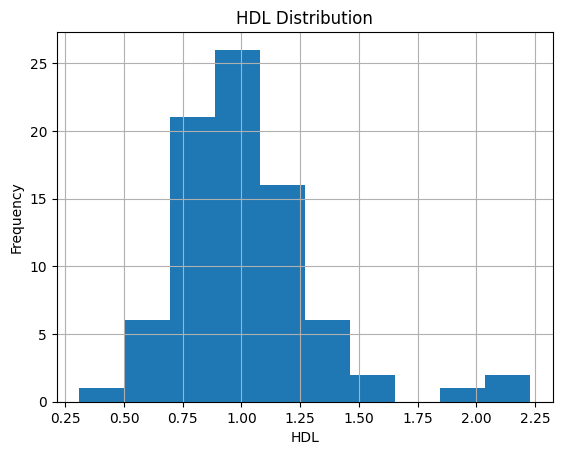

In [ ]:
#Histogram for HDL
df['HDL'].hist(bins=10)
plt.xlabel('HDL')
plt.ylabel('Frequency')
plt.title('HDL Distribution')
plt.show()


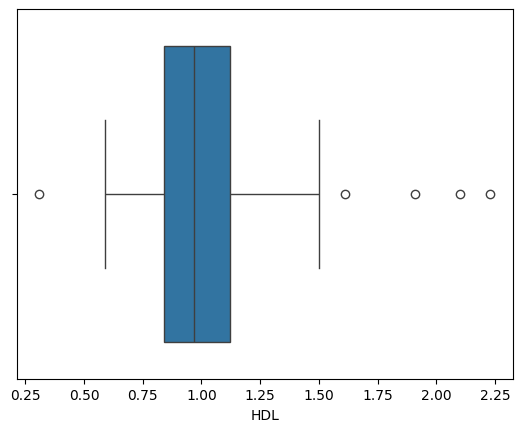

In [ ]:
# Create the box plot for HDL
sns.boxplot(x=df['HDL'])
plt.show()

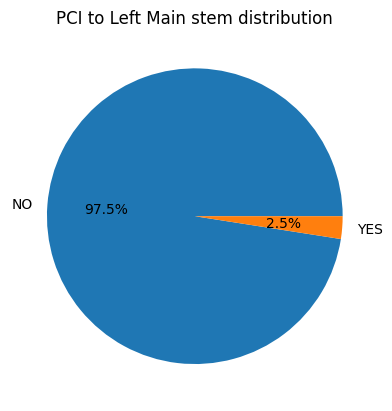

In [ ]:
# Count the occurrences of each PCI to Left Main stem
gender_counts = df['PCI to Left Main stem'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('PCI to Left Main stem distribution')
plt.show()


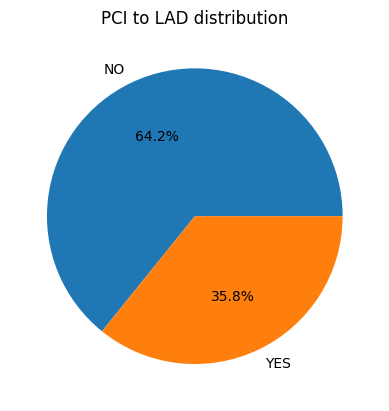

In [ ]:
# Count the occurrences of each PCI to LAD
gender_counts = df['PCI to LAD'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('PCI to LAD distribution')
plt.show()


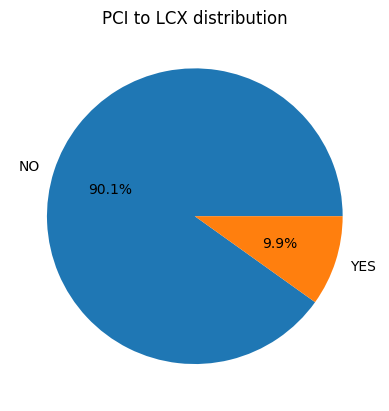

In [ ]:
# Count the occurrences of each PCI to LCX
gender_counts = df['PCI to LCX'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('PCI to LCX distribution')
plt.show()


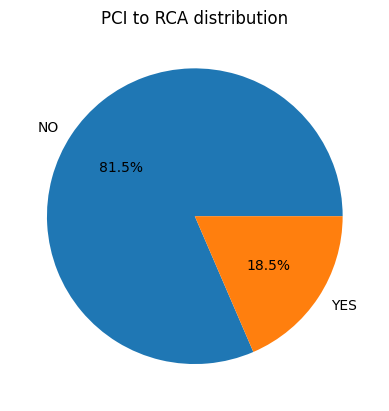

In [ ]:
# Count the occurrences of each PCI to RCA
gender_counts = df['PCI to RCA'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('PCI to RCA distribution')
plt.show()


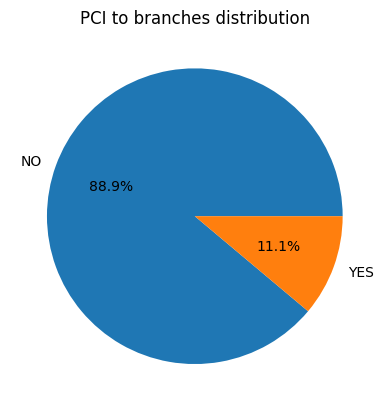

In [ ]:
# Count the occurrences of each PCI to branches
gender_counts = df['PCI to branches'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('PCI to branches distribution')
plt.show()

In [ ]:
HOMOCYSTEINE	B1	B6	SYNTAX

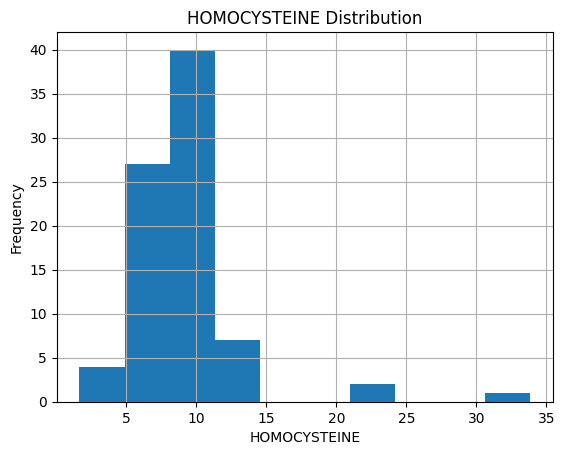

In [ ]:
#Histogram for HOMOCYSTEINE
df['HOMOCYSTEINE'].hist(bins=10)
plt.xlabel('HOMOCYSTEINE')
plt.ylabel('Frequency')
plt.title('HOMOCYSTEINE Distribution')
plt.show()



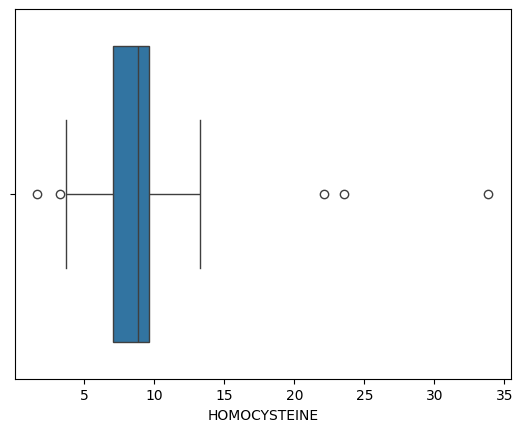

In [ ]:
# Create the box plot for HOMOCYSTEINE
sns.boxplot(x=df['HOMOCYSTEINE'])
plt.show()

In [ ]:
# To convert string to float
df['B12'] = df['B12'].str.replace('<', '', regex=False)  # Remove '<'
df['B12'] = pd.to_numeric(df['B12'], errors='coerce') # Convert to numeric, handle errors
# to replace missing values with mean
df['B12'] = df['B12'].fillna(df['B12'].mean())

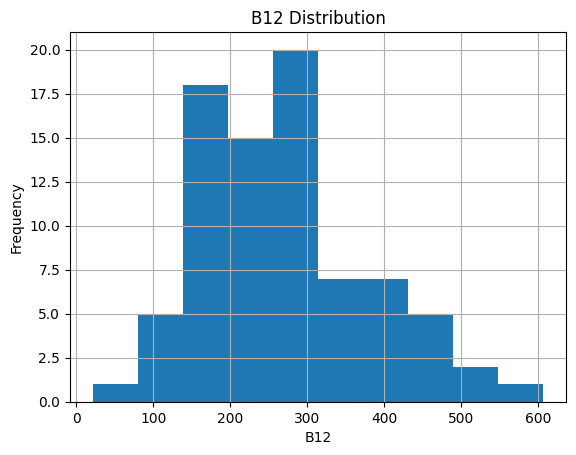

In [ ]:
#Histogram for B1
df['B12'].hist(bins=10)
plt.xlabel('B12')
plt.ylabel('Frequency')
plt.title('B12 Distribution')
plt.show()

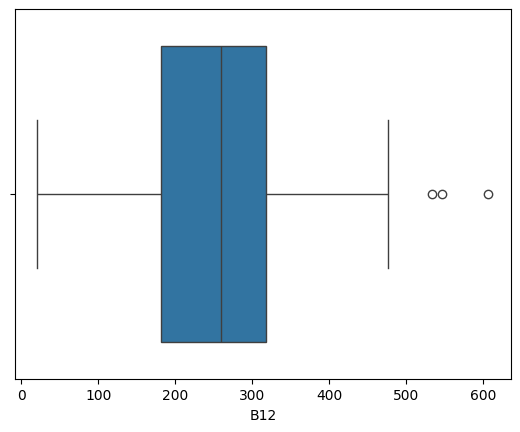

In [ ]:
# Create the box plot for B12
sns.boxplot(x=df['B12'])
plt.show()

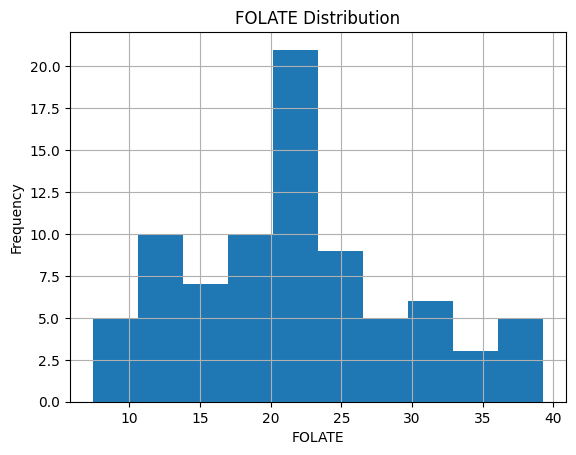

In [ ]:
#Histogram for FOLATE
df['FOLATE'].hist(bins=10)
plt.xlabel('FOLATE')
plt.ylabel('Frequency')
plt.title('FOLATE Distribution')
plt.show()

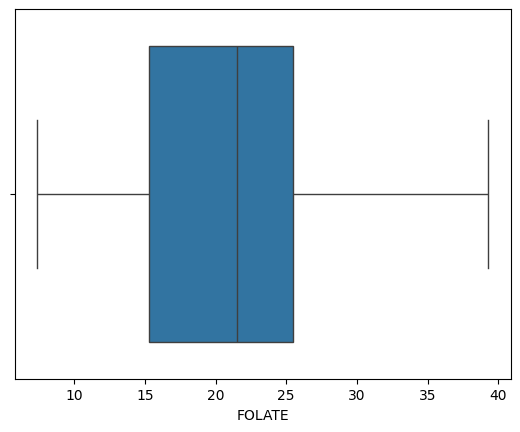

In [ ]:
# Create the box plot for FOLATE
sns.boxplot(x=df['FOLATE'])
plt.show()

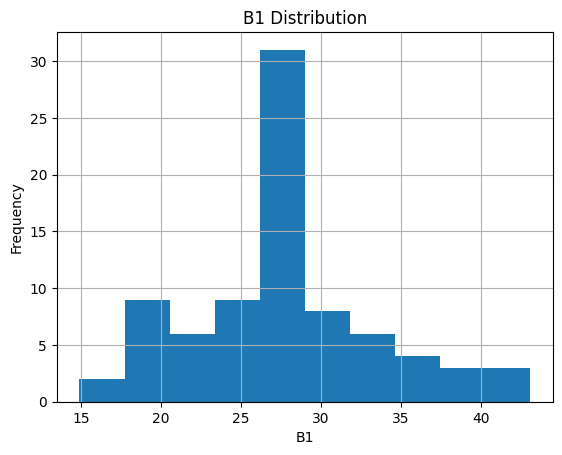

In [ ]:
#Histogram for B1
df['B1'].hist(bins=10)
plt.xlabel('B1')
plt.ylabel('Frequency')
plt.title('B1 Distribution')
plt.show()

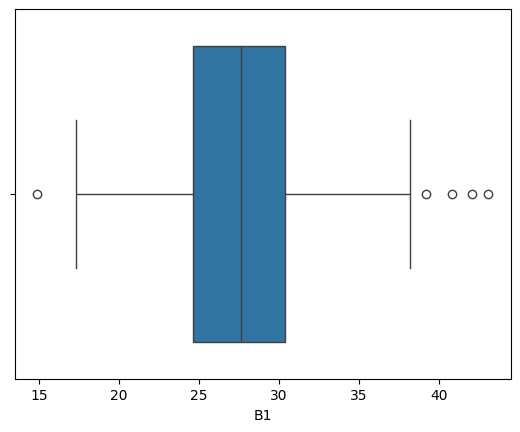

In [ ]:
# Create the box plot for B1
sns.boxplot(x=df['B1'])
plt.show()

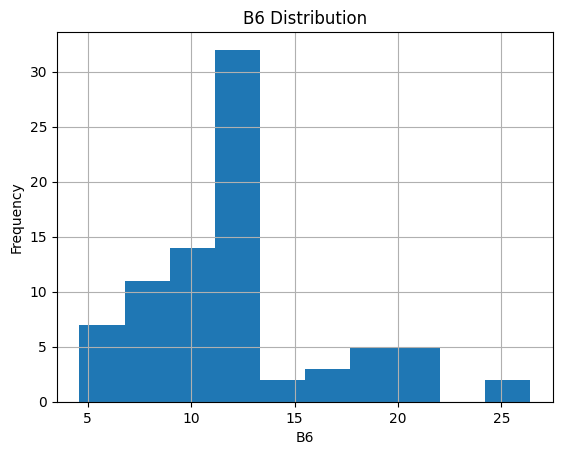

In [ ]:
#Histogram for B6
df['B6'].hist(bins=10)
plt.xlabel('B6')
plt.ylabel('Frequency')
plt.title('B6 Distribution')
plt.show()

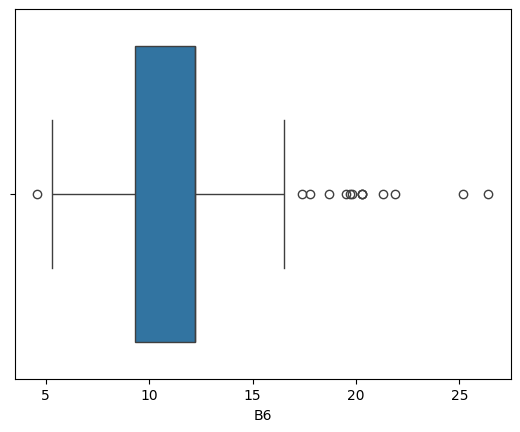

In [ ]:
# Create the box plot for B6
sns.boxplot(x=df['B6'])
plt.show()

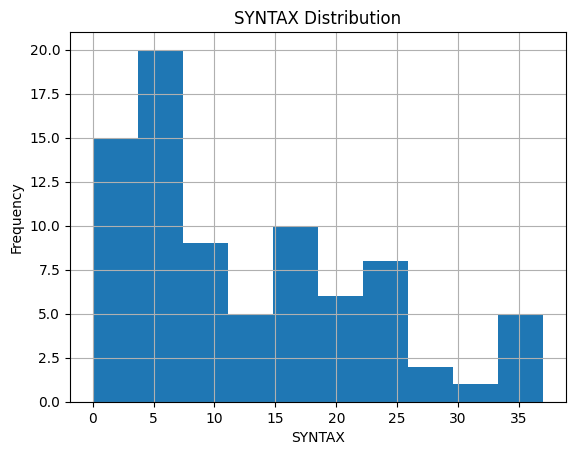

In [ ]:
#Histogram for SYNTAX
df['SYNTAX'].hist(bins=10)
plt.xlabel('SYNTAX')
plt.ylabel('Frequency')
plt.title('SYNTAX Distribution')
plt.show()

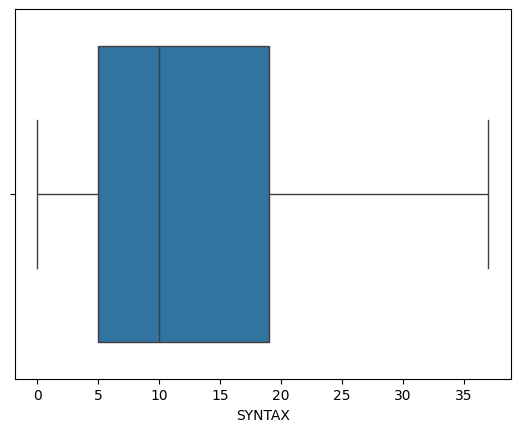

In [ ]:
# Create the box plot for SYNTAX
sns.boxplot(x=df['SYNTAX'])
plt.show()

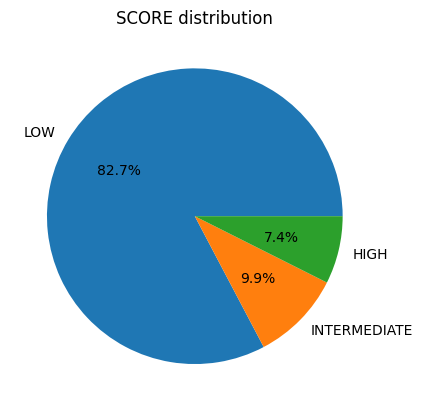

In [ ]:
# Count the occurrences of each SCORE
gender_counts = df['SCORE'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('SCORE distribution')
plt.show()

In [ ]:
#TEST OF NORMAILITY
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['HOMOCYSTEINE'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.6810466124732697
P-Value: 5.639512968992049e-12


In [ ]:
#TEST OF NORMAILITY
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['FOLATE'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9684795194469016
P-Value: 0.043215393136519925


In [ ]:
#TEST OF NORMAILITY
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['B12'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9582396379754166
P-Value: 0.009867702575119656


In [ ]:
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['B1'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9537162491239933
P-Value: 0.005281429920828372


In [ ]:
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['B6'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.8960679103744863
P-Value: 7.436769462922874e-06


In [ ]:
# SPEARMAN Correlations for HOMOCYSTEINE and FOLATE
import numpy as np
from scipy import stats
res = stats.spearmanr(df['HOMOCYSTEINE'], df['FOLATE'])
res.statistic, res.pvalue

(-0.2439385133038111, 0.028192942259488513)

In [ ]:
# SPEARMAN Correlations for HOMOCYSTEINE and B12
import numpy as np
from scipy import stats
res = stats.spearmanr(df['HOMOCYSTEINE'], df['B12'])
res.statistic, res.pvalue

(-0.21906061806218508, 0.04943303106937435)

In [ ]:
# SPEARMAN Correlations for HOMOCYSTEINE and B1
import numpy as np
from scipy import stats
res = stats.spearmanr(df['HOMOCYSTEINE'], df['B1'])
res.statistic, res.pvalue

(-0.016028111909476332, 0.8870642040524336)

In [ ]:
# SPEARMAN Correlations for HOMOCYSTEINE and B6
import numpy as np
from scipy import stats
res = stats.spearmanr(df['HOMOCYSTEINE'], df['B6'])
res.statistic, res.pvalue

(-0.07599275544130572, 0.5001329914869113)

In [ ]:
# Calculate Spearman correlation
spearman_corr = df[['HOMOCYSTEINE', 'FOLATE']].corr(method='spearman')

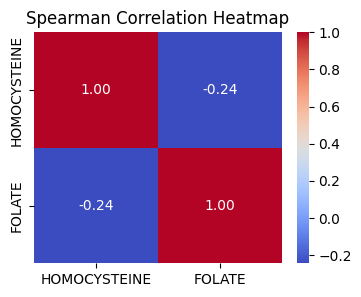

In [ ]:
# Plot heatmap for the two columns
plt.figure(figsize=(4, 3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separate the predictors (X) and response variable (y)
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Peak Creatinine (µmol/L or mg/dl)'].values.reshape(-1, 1)  # Response variable


# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")


Intercept: [13.18755057]
Coefficient: [-0.00541615]


R-squared: 0.0005949028846859994


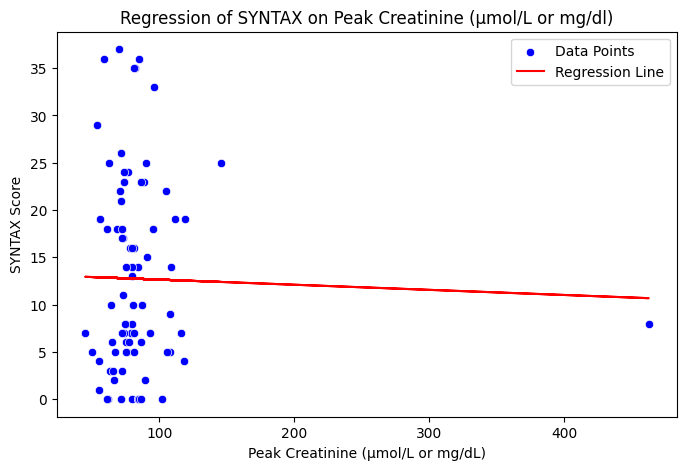

In [ ]:
# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Peak Creatinine (µmol/L or mg/dl)', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Peak Creatinine (µmol/L or mg/dl)'], y_pred, color='red', label='Regression Line')
plt.xlabel('Peak Creatinine (µmol/L or mg/dL)')
plt.ylabel('SYNTAX Score')
plt.title('Regression of SYNTAX on Peak Creatinine (µmol/L or mg/dl)')
plt.legend()
plt.show()

In [ ]:
Lowest Hb

Coefficient: [-0.48999942]
R-squared: 0.009538733003386701


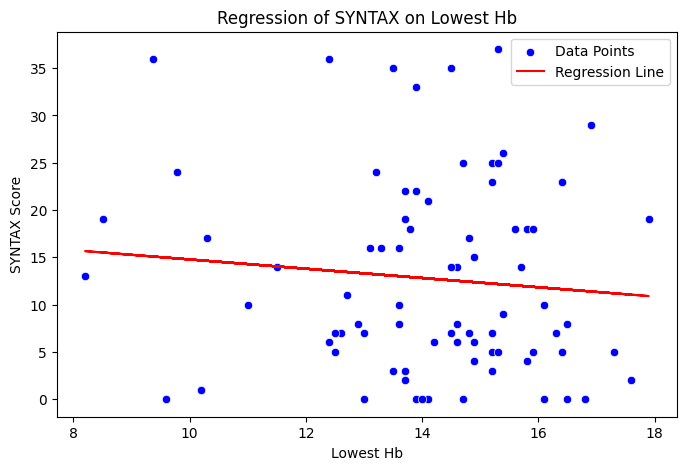

In [ ]:
# REGRESSION OF LOWEST HB ON SYNTAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separate the predictors (X) and response variable (y)
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Lowest Hb'].values.reshape(-1, 1)  # Response variable


# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Lowest Hb', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Lowest Hb'], y_pred, color='red', label='Regression Line')
plt.xlabel('Lowest Hb')
plt.ylabel('SYNTAX Score')
plt.title('Regression of SYNTAX on Lowest Hb')
plt.legend()
plt.show()


In [ ]:
Total Cholesterol

Coefficient: [-0.20184823]
R-squared: 0.0008013911952923225


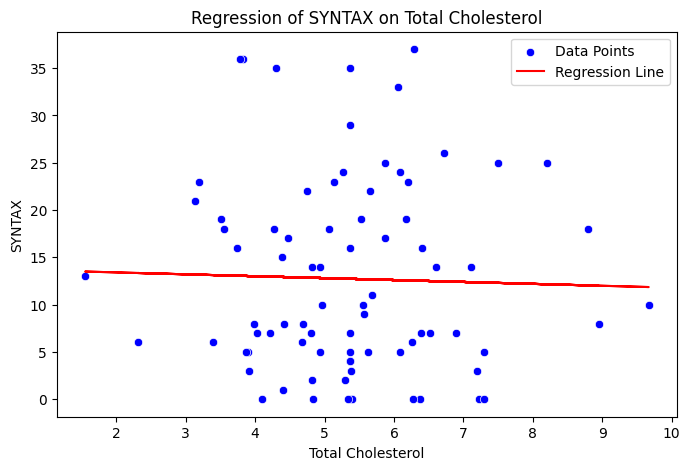

In [ ]:
# REGRESSION OF TOTAL CHOLESTEROL ON SYNTAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separate the predictors (X) and response variable (y)
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Total Cholesterol'].values.reshape(-1, 1)  # Response variable


# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Total Cholesterol', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Total Cholesterol'], y_pred, color='red', label='Regression Line')
plt.xlabel('Total Cholesterol')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on Total Cholesterol')
plt.legend()
plt.show()


Coefficient: [-0.49295836]
R-squared: 0.0034268111391966283


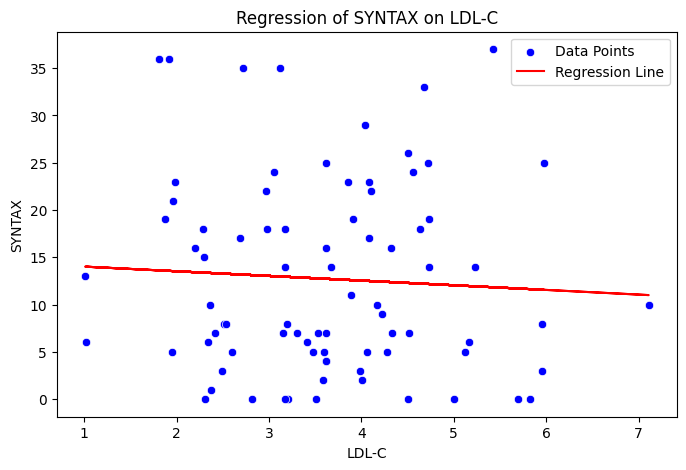

In [ ]:
# REGRESSION OF LDL-C ON SYNTAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separate the predictors (X) and response variable (y)
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['LDL-C'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='LDL-C', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['LDL-C'], y_pred, color='red', label='Regression Line')
plt.xlabel('LDL-C')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on LDL-C')
plt.legend()
plt.show()


Coefficient: [-0.19240986]
R-squared: 0.0006070651479156419


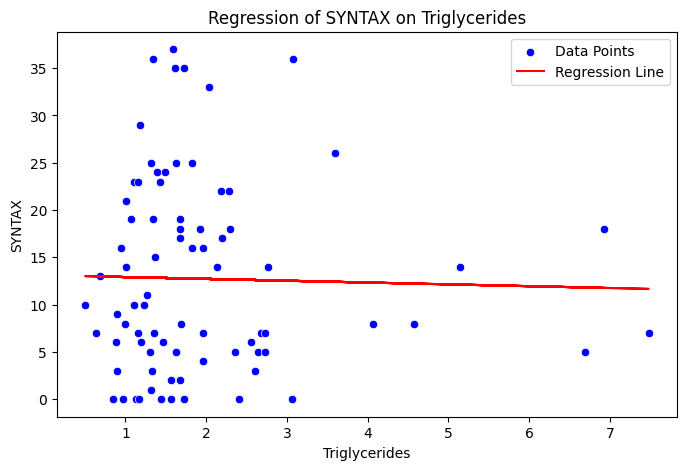

In [ ]:
# REGRESSION OF  Triglycerides ON SYNTAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separate the predictors (X) and response variable (y)
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Triglycerides'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Triglycerides', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Triglycerides'], y_pred, color='red', label='Regression Line')
plt.xlabel('Triglycerides')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on Triglycerides')
plt.legend()
plt.show()


Coefficient: [-5.7780248]
R-squared: 0.029708892403648046


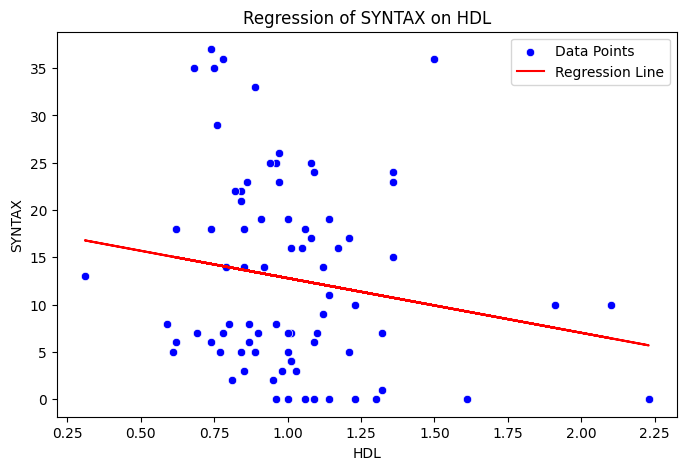

In [ ]:
# REGRESSION OF HDL ON SYNTAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separate the predictors (X) and response variable (y)
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['HDL'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='HDL', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['HDL'], y_pred, color='red', label='Regression Line')
plt.xlabel('HDL')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on HDL')
plt.legend()
plt.show()


In [13]:
# CREATION OF DUMMY VARIABLES FOR CATEGORICAL VARIABLES USED IN MULTIVARIATE REGRESSION
import numpy as np

df['Gender2'] = np.where(df['Gender'] == 'M', 1, 0)
df['DM2'] = np.where(df['DM'] == 'YES', 1, 0)
df['HTN2'] = np.where(df['HTN'] == 'YES', 1, 0)
df['Dyslipidemia2'] = np.where(df['Dyslipidemia'] == 'YES', 1, 0)
df['Current Smoking2'] = np.where(df['Current Smoking'] == 'YES', 1, 0)
df['Drug Abuse2'] = np.where(df['Drug Abuse'] == 'YES', 1, 0)
df['History of Heart Failure2'] = np.where(df['History of Heart Failure'] == 'YES', 1, 0)
df['History of Stroke2'] = np.where(df['History of Stroke'] == 'YES', 1, 0)
df['Hsitory of chronic kidney disease2'] = np.where(df['Hsitory of chronic kidney disease'] == 'YES', 1, 0)


Intercept: 7.742616451440119
Coefficients: [-7.18594513e-03  2.13953122e-01 -1.15683171e-01 -1.42259017e+00
  1.88624449e-01  7.06816677e+00  2.49535262e+00 -1.95637114e+00
 -8.57664276e-01  1.17056428e+01  0.00000000e+00 -1.05203862e+01]
R-squared (R²): 0.17533999313094983


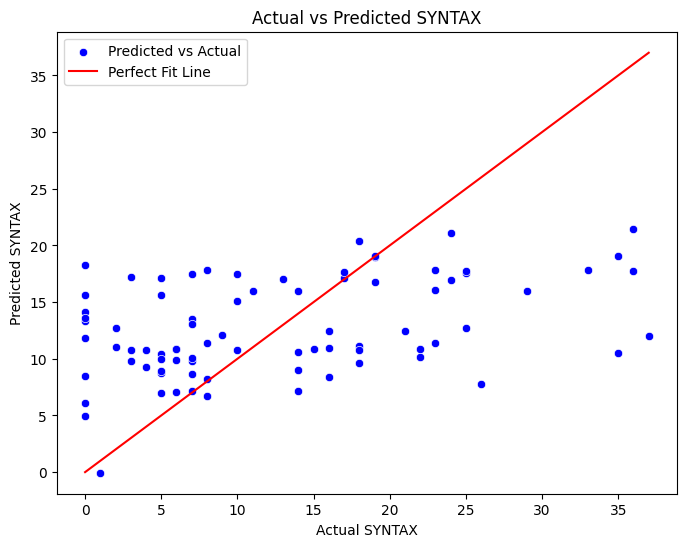

In [ ]:
# Multivariate Regression of Peak Creatinine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (X) and dependent variable (y)
X = df[['Peak Creatinine (µmol/L or mg/dl)', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Intercept: 14.331141189421746
Coefficients: [ -0.53652838   0.21489932  -0.14835958   0.08656461  -0.19817928
   7.08623372   3.85525746  -1.87383024  -0.80710826  11.61820948
   0.         -10.3881443 ]
R-squared (R²): 0.18344645762704903


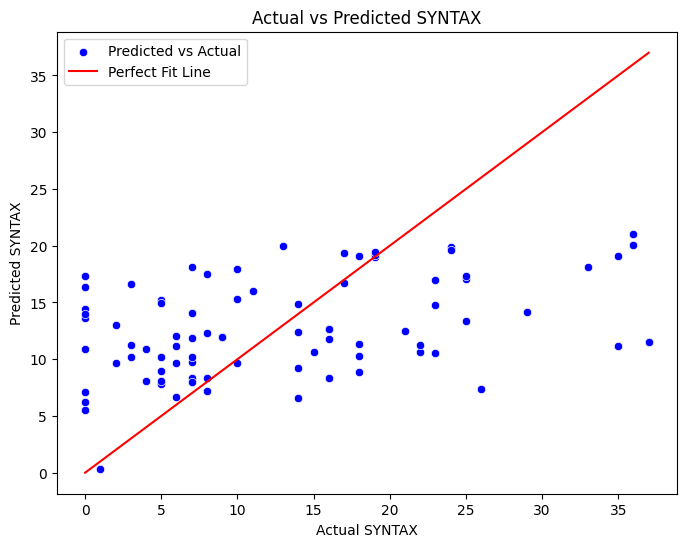

In [ ]:
# Multivariate Regression of Lowest Hb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define independent variables (X) and dependent variable (y)
X = df[['Lowest Hb', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Intercept: 8.747971695034817
Coefficients: [ -0.38991493   0.21683245  -0.10165881  -1.63724274  -0.08225299
   6.99559075   1.64537944  -1.70540815  -0.66430371  12.90821543
   0.         -11.00742402]
R-squared (R²): 0.1764393334951576


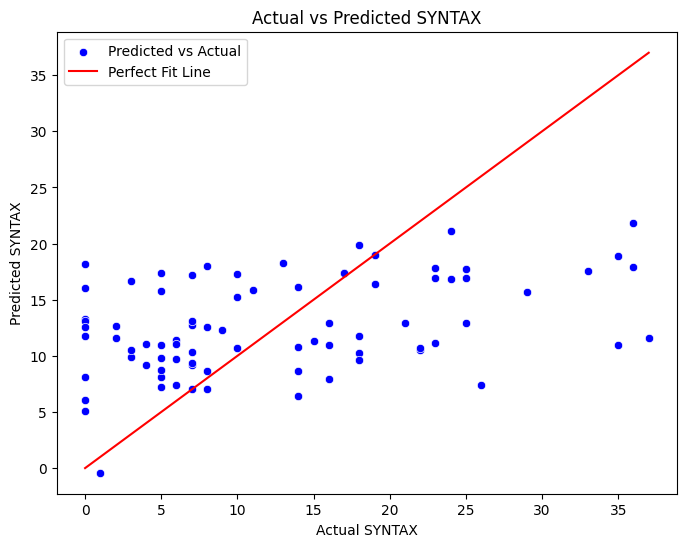

In [ ]:
# Multivariate Regression of Total Cholesterol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (X) and dependent variable (y)
X = df[['Total Cholesterol', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Intercept: 7.852026528891955
Coefficients: [ -0.63188527   0.2211677   -0.08894999  -1.19920387  -0.23583499
   7.04264618   1.18059864  -1.65978274  -0.4473487   12.49896114
   0.         -11.10380386]
R-squared (R²): 0.1782715089835708


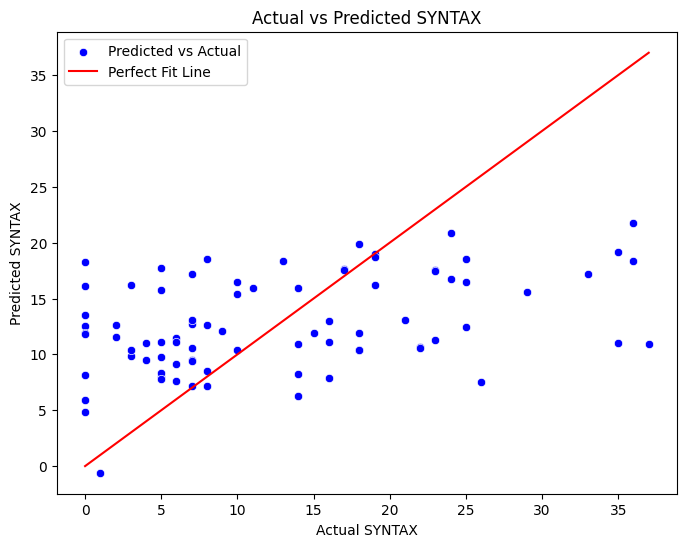

In [ ]:
# Multivariate Regression of LDL-C
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (X) and dependent variable (y)
X = df[['LDL-C', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Intercept: 6.9473473450582315
Coefficients: [  0.21035601   0.22255571  -0.13001993  -1.55609533   0.17585307
   7.03141399   2.45327672  -1.91894113  -0.94069627  12.00988776
   0.         -10.26500359]
R-squared (R²): 0.17509402024988874


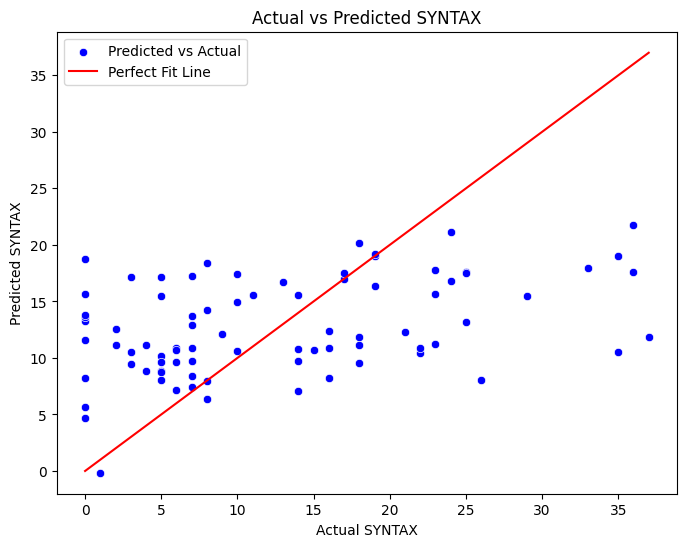

In [61]:
# Multivariate Regression of Triglycerides
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (X) and dependent variable (y)
X = df[['Triglycerides', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Intercept: 18.638671085947152
Coefficients: [ -8.15867339   0.24785606  -0.10524943  -6.53121179   0.57065972
   6.12205596   2.76559097  -2.10882761  -0.87959374  13.17300299
   0.         -11.85502056]
R-squared (R²): 0.21860127218168246


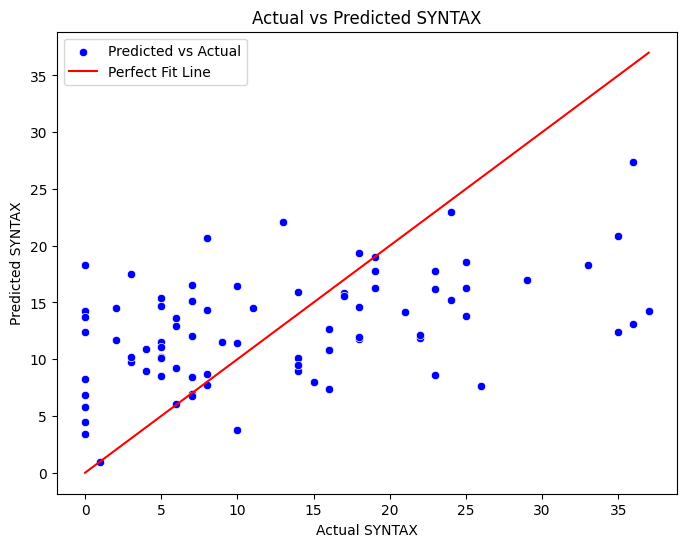

In [62]:
# Multivariate Regression of HDL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (X) and dependent variable (y)
X = df[['HDL', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

In [24]:
#TEST OF NORMAILITY for SYNTAX
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['SYNTAX'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9199850906723062
P-Value: 8.593739666251636e-05


In [25]:
#TEST OF NORMAILITY for Peak Creatinine
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['Peak Creatinine (µmol/L or mg/dl)'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.3836450520472806
P-Value: 9.082747696837981e-17


In [27]:
#Mann Whitney U test for SYNTAX Grouped by Gender
import pandas as pd
from scipy.stats import mannwhitneyu

# Split data by gender
male_scores = df[df['Gender'] == 'M']['SYNTAX']
female_scores = df[df['Gender'] == 'F']['SYNTAX']

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

print(f"U Statistic: {stat}")
print(f"P-value: {p}")

U Statistic: 189.0
P-value: 0.992157776865105


In [28]:
# Kruskal-Wallis H Test for Peak Creatinine groued by Type of Presentation
import pandas as pd
from scipy.stats import kruskal

# Split data by category
group_a = df[df['Type of Presentation'] == 'STEMI']['Peak Creatinine (µmol/L or mg/dl)']
group_b = df[df['Type of Presentation'] == 'NSTEMI']['Peak Creatinine (µmol/L or mg/dl)']
group_c = df[df['Type of Presentation'] == 'UNSTABLE ANGINA']['Peak Creatinine (µmol/L or mg/dl)']

# Perform Kruskal-Wallis H Test
stat, p = kruskal(group_a, group_b, group_c)

print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p}")


Kruskal-Wallis Statistic: 0.5542407202749111
P-value: 0.757963263057619
